# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

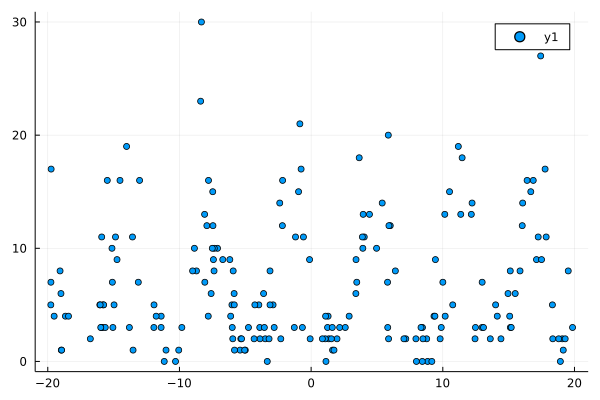

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -601.5175422511651
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.596036 seconds (7.09 M allocations: 457.710 MiB, 10.45% gc time, 98.22% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.17726225437461474, 0.5446391518825234, 0.43153246615648166, 0.24015674145761384, 0.33546643605710896, 0.46316322127672355, 0.2788268499376906, 0.4323616363788338, 0.4430727697481499, 0.30156251758620406  …  0.353156841726786, 0.2341655381132082, 0.32114582183404766, 0.6748223471796854, 0.1733188602329832, 0.36189691723422246, 0.5672182828867077, 0.15463433364163306, 0.6367922241920599, 0.21169044805341458], θ = [4.488253692697442, 9.759925689619577, 12.801948676029768, 3.9808851510022474, 6.935083449366197, 2.4562466563513112, 3.477499459382531, 3.4464771452528047, 3.4438440615576082, 4.466204817979395  …  12.371683709038681, 4.4795495673477745, 3.9659726835006364, 2.8911097271003356, 6.982529479301922, 7.913815656126794, 3.40908414334133, 4.491054473307527, 3.3863348575213097, 10.460963683443229]), opt_state = (NamedTuple(),), hyperopt_state = (

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -689.4594413170405
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.334508 seconds (4.68 M allocations: 333.888 MiB, 4.96% gc time, 96.01% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.521831231513763) infered by Analytic Variational Inference , (local_vars = (c = [0.3015037377586374, 0.515580112483356, 0.34657376564389947, 0.41303410970027593, 0.20716582336480407, 0.6815178842507744, 0.46257914872409855, 0.662958315910538, 0.6806437243055106, 0.48718874099275056  …  0.2361807644561738, 0.34163721084410387, 0.5032051146008117, 0.870325422895227, 0.19906177664756386, 0.24837909459979202, 0.7749204454147749, 0.2289099804596066, 0.8342946590909385, 0.13165790181239478], θ = [6.038255605757897, 10.0234368812941, 13.411882665190442, 5.6960987838564385, 7.896553901125614, 4.598394090467061, 5.2638012469617, 5.557513203215989, 5.563995170386569, 6.274128092891175  …  13.205749836150062, 6.044922182048679, 5.797171912149439, 5.220811435640423, 8.350517410917108, 8.709755486325076, 5.650223641806056, 5.932396732169681, 5.673077395902949, 11.660348984801402], γ = [8.16785701057166, 5.4889951351626545, 6.0917204554

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

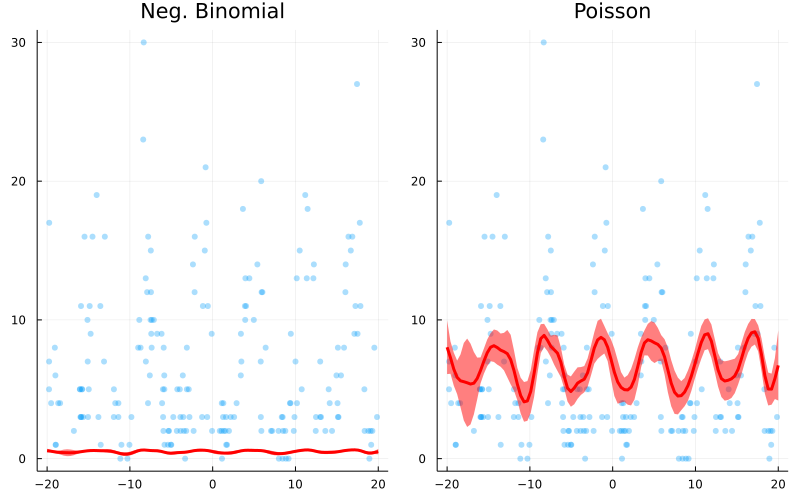

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*